# Assignment 1 - b2210765024 - İlbey GÜLMEZ

Either T ,AH, CO(GT) columns can be chosen as target features. But AH column is mainly treated like target feature in this assignment.

## Loading and shaping the Dataset

Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

Reformat the dataset

In [ ]:
data_raw = pd.read_csv('data.csv')

columns = data_raw.columns[0].split(";")
columns = [column for column in columns if column != ""]

data = pd.DataFrame(columns = columns)

cells = data_raw[data_raw.columns[0]]

for col_index in range(len(data.columns)):
    col_list = []
    for cell_index in range(len(cells)):
        row = cells[cell_index].split(";")
        col_list.append(row[col_index])
    data[data.columns[col_index]] = col_list

## Data Preprocessing

Check for missing values - no NaN values

In [ ]:
data = data[data != ""]
data.dropna(inplace = True)

Convert features to float

In [ ]:
numeric_columns = list(data.columns[2:])
for column in numeric_columns:
    data[column] = data[column].str.replace(',','.').astype(float)

### Handle erroneous data

#### 'Date'

In date column;

Day values should be in range 1-32,

Month values should be in range 1-13,


In [ ]:
is_day_invalid = False
is_month_invalid = False

for date in data['Date']:
    date_list = date.split("/")
    day = date_list[0]
    month = date_list[1]
    if int(day) not in range(1,32):
        is_day_invalid = True
        print(day, " is an invalid value for a day.")
    if int(month) not in range(1,13):
        is_month_invalid = True
        print(month, " is an invalid value for the month.")

if not is_day_invalid and not is_month_invalid:
    print("All values are valid in 'Date' column")


All values are valid in 'Date' column


#### 'Time'

In time column;

Hour values should be in range 0-25,

Minute and Second values should be in range 0-61.

In [ ]:
is_hour_invalid = False
is_minute_invalid = False
is_second_invalid = False

for time in data['Time']:
    time_list = time.split(".")
    hour = time_list[0]
    minute = time_list[1]
    second = time_list[2]
    if int(hour) not in range(0,25):
        is_hour_invalid = True
        print(hour, " is an invalid value for an hour.")
    if int(minute) not in range(0,61):
        is_minute_invalid = True
        print(minute, " is an invalid value for the minute.")
    if int(second) not in range(0,61):
        is_second_invalid = True
        print(second, " is an invalid value for the secnd.")

if not is_day_invalid and not is_month_invalid and not is_second_invalid:
    print("All values are valid in 'Time' column")

All values are valid in 'Time' column


#### 'RH' (Relative Humidity)

In RH column;

The values should be in range 0-101 because it's represented with %.

Replace the invalid values with the mean of 'RH' data.

In [ ]:
out_of_bounds = (data['RH'] < 0) | (data['RH'] > 100)

data.loc[out_of_bounds,'RH'] = np.nan

data['RH'].fillna(data['RH'].mean(),inplace = True)

#### Other columns

Remaining columns (except 'T' - which will be inspected later on-) should be positive since they represent an amount.

Invalid values are replaced with the mean of corresponding columns.

In [ ]:
remaining_columns = ['AH','CO(GT)','PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)']

for column in remaining_columns:
    data.loc[data[column] < 0,column] = np.nan #Dropped -200 values
    data[column].fillna(data[column].mean(),inplace = True)

### Visualize the data, detect and handle outliers

In [ ]:
for column in numeric_columns:
    print(f"The maximum value in {column} : " ,data[column].max())
    print(f"The mean of {column} : " ,data[column].mean())
    print(f"The minimum value in {column} : " ,data[column].min())
    print()

The maximum value in CO(GT) :  11.9
The mean of CO(GT) :  2.152749543914531
The minimum value in CO(GT) :  0.1

The maximum value in PT08.S1(CO) :  2040.0
The mean of PT08.S1(CO) :  1099.8331664998343
The minimum value in PT08.S1(CO) :  647.0

The maximum value in NMHC(GT) :  1189.0
The mean of NMHC(GT) :  218.81181619252163
The minimum value in NMHC(GT) :  7.0

The maximum value in C6H6(GT) :  63.7
The mean of C6H6(GT) :  10.0831053275497
The minimum value in C6H6(GT) :  0.1

The maximum value in PT08.S2(NMHC) :  2214.0
The mean of PT08.S2(NMHC) :  939.1533755978149
The minimum value in PT08.S2(NMHC) :  383.0

The maximum value in NOx(GT) :  1479.0
The mean of NOx(GT) :  246.8967349054181
The minimum value in NOx(GT) :  2.0

The maximum value in PT08.S3(NOx) :  2683.0
The mean of PT08.S3(NOx) :  835.49360471583
The minimum value in PT08.S3(NOx) :  322.0

The maximum value in NO2(GT) :  340.0
The mean of NO2(GT) :  113.09125081011054
The minimum value in NO2(GT) :  2.0

The maximum val

Define a function that plots the given data's distribution:

In [ ]:
def plot_feature_distributions(data, columns):
    plt.figure(figsize=(15, 12))
    for i, column in enumerate(columns):
        plt.subplot(3, 4, i+1)  # Create subplots
        sns.histplot(data[column], bins=20, kde=True)
        plt.title(column)
    plt.tight_layout()
    plt.show()

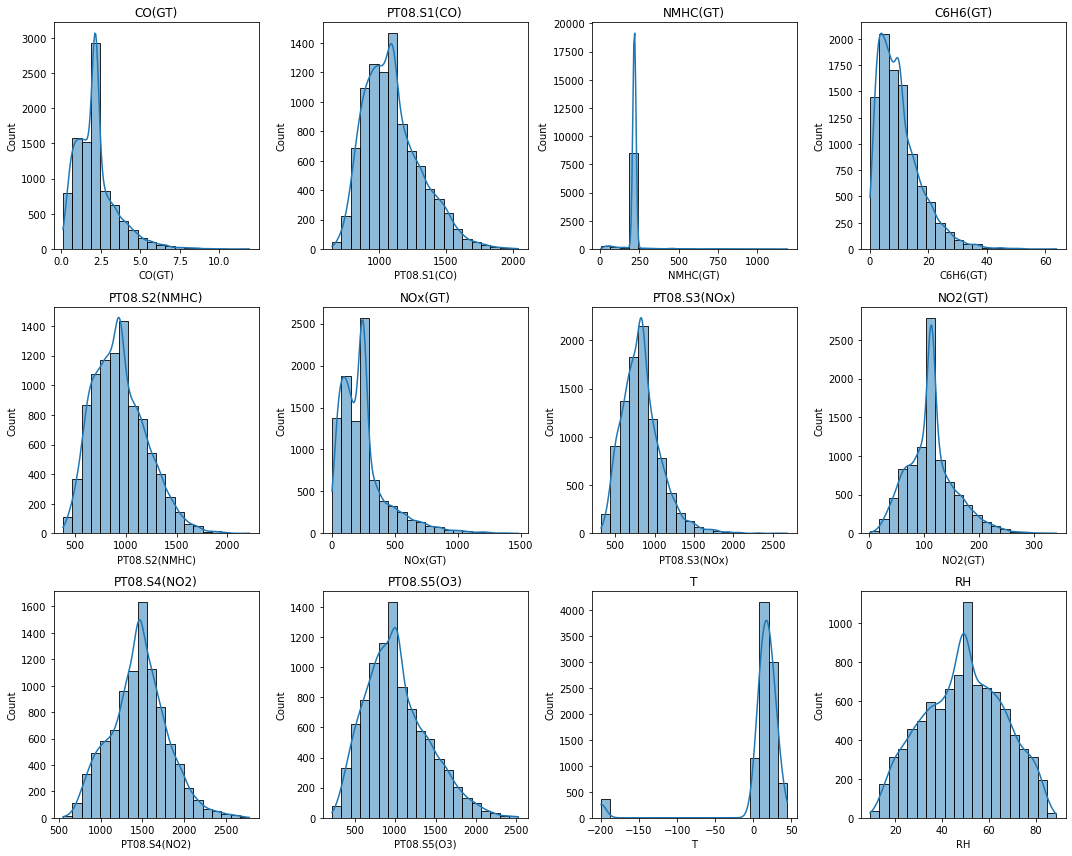

In [ ]:
plot_feature_distributions(data, numeric_columns[:-1])

From the histograms above, it can be concluded that data is very noisy.

-CO(GT) data is right skewed. Meaning the outliers tend to be higher rather than lower. Also, mean is bigger than the median.

-PT08 S1(CO) data is right skewed with the longest tail and its closer to normal distribution than CO(GT).

-NMHC(GT) data has a small range of data with high frequencies focused between 230-250. Assigning smaller weight to this would make model perform better if these aren't strongly correlated with target feature.

-C6H6(GT) is also right skewed and its further to normal distribution than others.

-PT08 S2(NMHC) data is almost similar to PT08 S1(CO) data.

-NOx(GT) data is also right skewed.

-PT08 S3(NOx) data has a shorter tail compared to other PT08 measurements.

-NO2(GT) data is slightly right skewed, making it closer to the normal distribution. Data has high frequency between 100-120.

-PT08 S4(NO2) data can be interpreted as the smoother version of NO2(GT)

-PT08 S5(O3) data is slighty right skewed and has less noise then NO2(GT)

-T data has erroneous values at -200 and they will be handled.

-RH data is normally distributed with data focused in 48-52 bin.

Summary, it can be concluded that the data is very noisy, has outliers and erroneous inputs.

Consequantially, calculating IQR and handling the values that falls over 1.5 * IQR of third quantile or below -1.5 * IQR of first quantile will make them smoother and features will contribute to possible model's performance.

NOTE : Histograms are going to be evaluated one more time after outlier handling.

In [ ]:
for column in numeric_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    bound_condition = (data[column] < lower_bound) | (data[column] > upper_bound)
    data.loc[bound_condition,column] = np.nan
    data[column].fillna(data[column].mean(),inplace = True)

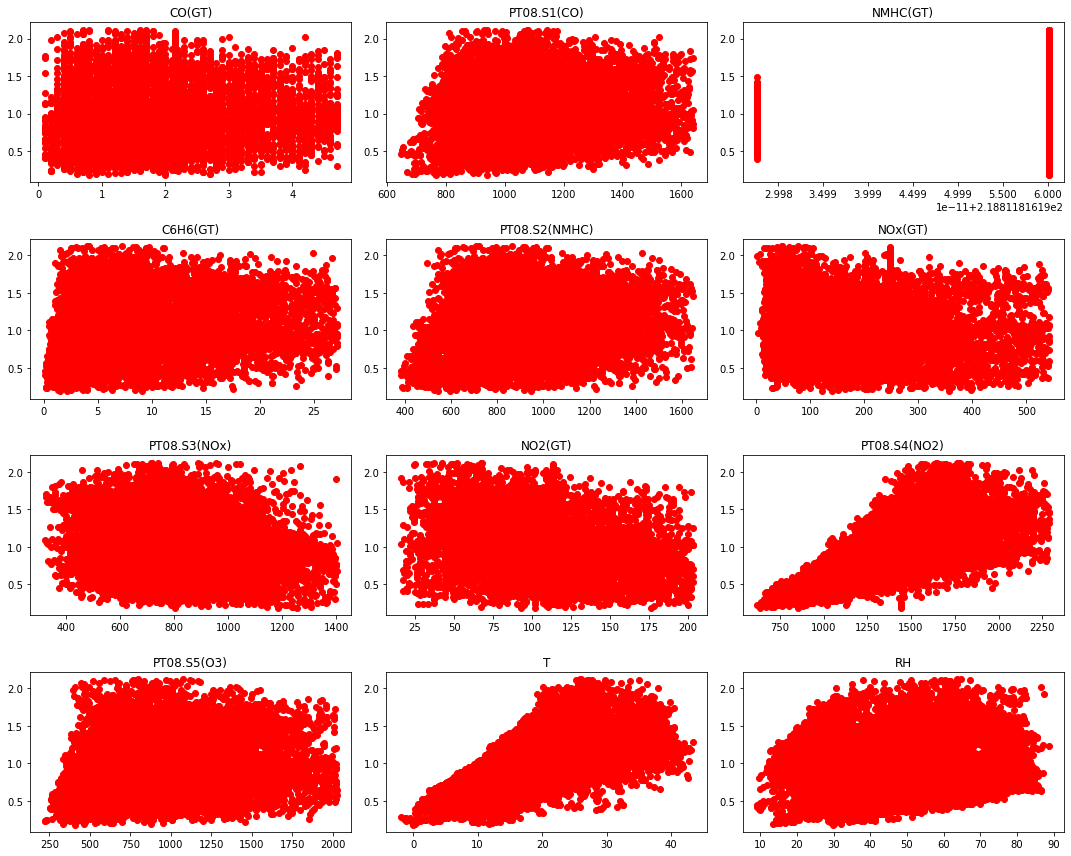

In [ ]:
plt.figure(figsize=(15, 12))
for i, column in enumerate(numeric_columns[:-1]):
    plt.subplot(4, 3, i + 1)
    plt.scatter(data[column], data['AH'],color = 'Red')
    plt.title(column)
plt.tight_layout()
plt.show()


It can be seen that no meaningful correlation there is between AH (possible target feature) and the others except T (Temperature) and PT08 S4(NO2).

AH feature is positively correlated with T and PT08 S4(NO2).

The feature shows unexpected relationship with NMHC(GT) feature.

Consequantially;

For possible models T and PT08 S4(NO2) should have more weights to improve models' performance.

NMHC(GT) feature can be dropped due to small range high frequency histogram distribution and unexpected scatter plot distribution.

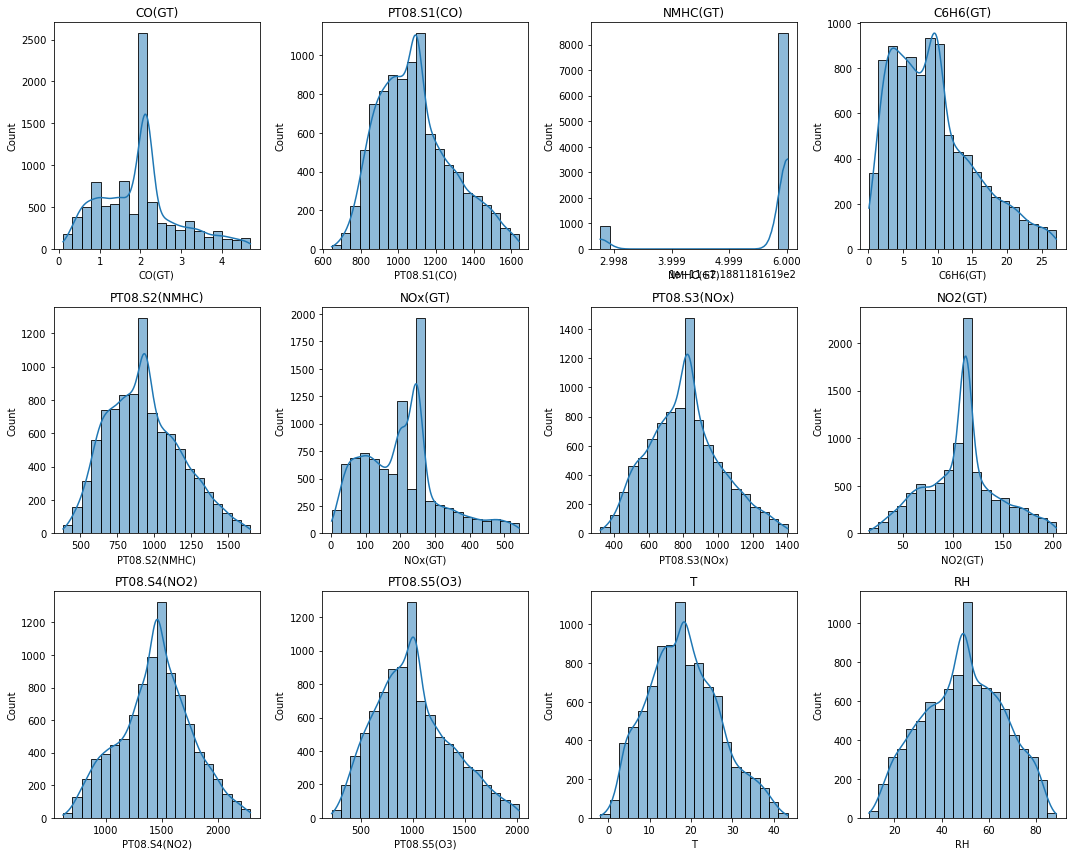

In [ ]:
plot_feature_distributions(data, numeric_columns[:-1])

After outlier handling, skewness of the distributions are reduced and they are all closer to normal distribution.

(Note that erroneous values in T column are eliminated too while detecting outliers.)

In this stage, the data is more refined and ready to be scaled.

## Step 3: Data Transformation

Apply Z - Score Normalization to scale the value.

I didn't use Min-Max scaling because data is very noisy.

In [ ]:
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

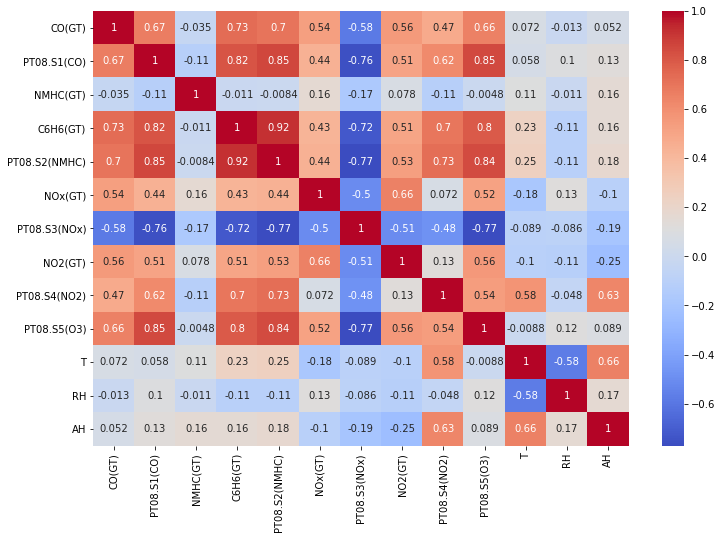

In [ ]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

If AH is chosen as a target feature:

-CO(GT) feature is not correlated with the target feature, but it has strong positive correlations with some other features, making this a bad feature for prediction.

-PT08 S1(CO) feature is also not correlated with target feature, but it has strong positive and negative correlations with some other features and making this a bad feature for prediction too.

-NMHC(GT) feature is not correlated with any of the features. So we can conclude that it is a irrelevant feature and should be dropped for simplicity sake.

-C6H6(GT) feature has low correlation with target feature but can show some correlation with others.

-PT08 S2(NMHC) feature also has low correlation with target feature but can show more correlation with others.

-NOx(GT) has low correlations with all features except NO2(GT).

-PT08 S3(NOx) has low correlation with target feature and has strong negative correlations with some other features.

-NO2(GT) has low correlation with other features as well.

-PT08 S4(NO2) has a fair correlation with target feature and has positive correlations with some other features. This feature should be assigned more weight for a better model.

-PT08 S5(O3) has low correlation with target feature and has strong positive correlations with some other features.

-T has fair correlation with the target feature and has low correlation with most of the other features. This should be assigned more weight too to improve the models performance.

-RH has low correlation with target feature and strong negative correlation with T.

-AH is a possible target feature.

## Step 7: Report and Summarize Insights

### Problem Statement:

The dataset under consideration contains environmental and atmospheric measurements, where the goal is to prepare the data for modeling and gain insights into its characteristics. Key challenges include missing values, erroneous data, outliers, and the identification of relevant features for predictive modeling.

### Solution:

The data preprocessing and exploratory data analysis (EDA) were conducted in a structured manner to address the challenges and process the dataset for further analysis and modeling.

### Preprocessing Steps:
#### Loading and Shaping the Dataset:

Imported necessary libraries for data analysis.

Reformatted the dataset, which was semicolon-separated, to make it suitable for further analysis.

#### Data Preprocessing:

Checked for missing values and removed empty rows.

Converted feature values to float data types.

Handled erroneous data in the 'Date' and 'Time' columns, ensuring the day, month, hour, minute, and second values fall within valid ranges.

Managed out-of-bounds values in the 'RH' column and other remaining columns.

#### Visualizing the Data and Detecting Outliers:


Conducted exploratory data analysis (EDA) by visualizing the distributions of numeric columns.

Calculated and applied the Interquartile Range (IQR) method to detect and handle outliers in these columns.

#### Exploratory Data Analysis:

Analyzed scatterplots to understand the relationships between the possible target feature 'AH' and other features.

Identified correlations between features, focusing on which features were strongly correlated with each other.

#### Data Transformation:


Applied Z-Score Normalization to scale the data, making it suitable for modeling.

### Summary Insights:

Several data preprocessing steps were applied, addressing issues such as missing values, erroneous data, and out-of-bounds values.

The distribution analysis of numeric columns revealed the presence of skewness and outliers in some features.

Outliers were detected and handled using the IQR method, smoothing the distributions of the features.

Scatterplots illustrated the relationships between the possible target feature 'AH' and other features, indicating that 'T' and 'PT08 S4(NO2)' had a positive correlation with 'AH.'

Correlation analysis identified that 'CO(GT)' and 'PT08 S1(CO)' had strong correlations with other features, suggesting that they might not be strong predictors of 'AH.'

'NMHC(GT)' was identified as an irrelevant feature due to its lack of correlation with other features.

After preprocessing, the data was successfully scaled using Z-Score Normalization.

These findings set the stage for further data analysis, feature engineering, and modeling.

The dataset is now more refined and suitable for developing predictive models, with 'T' and 'PT08 S4(NO2)' potentially playing crucial roles.

'NMHC(GT)' could be considered for removal due to its limited relevance.